<a href="https://colab.research.google.com/github/kratikajawariya28/Bike-Sharing-Demand-Prediction./blob/main/KJ_Bike_Sharing_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name    - Bike Sharing Demand Prediction**



##### **Project Type**    - Linear Regression
##### **Contribution**    - Team
##### **Team Member 1 -** Dharmendra Yadav
##### **Team Member 2 -** Pranita Tiwari
##### **Team Member 3 -** Kratika Jawariya



# **Project Summary**

The bike rental count prediction project addresses the pressing challenge of accurately forecasting demand for bike ride-sharing services in urban settings. This initiative combines historical bike usage patterns with weather data to construct predictive models that can provide precise forecasts. The dataset encompasses eight crucial input variables, including date, seasons, holidays, temperature, humidity, and more. To tackle this complex problem, the project employs a suite of Python libraries such as Pandas, Seaborn, NumPy, and scikit-learn.

The project proceeds through a series of meticulously orchestrated steps. First, data wrangling and cleaning are performed to ensure data integrity and consistency. This includes handling missing values, addressing outliers, and preparing the dataset for analysis. Subsequently, an exploratory data analysis (EDA) phase provides critical insights into the dataset's patterns and relationships between variables. Visualizations and statistical analysis aid in understanding the data's nuances.

Feature engineering follows, where new features are created or existing ones are modified to enhance model predictability. This includes encoding categorical data, transforming variables, and preparing datetime features for modeling. To enhance model stability, outliers are identified and removed from the dataset. Data transformation, such as scaling and normalization, ensures variables are on a similar scale and suitable for modeling. Categorical variables are encoded into numerical format, using techniques like one-hot encoding or label encoding, to make them compatible with machine learning models. Scaling techniques, such as Min-Max scaling or Z-score scaling, are applied to ensure that no single feature dominates the modeling process. Multicollinearity, a situation where independent variables are highly correlated, is identified and addressed to ensure model interpretability and stability.

The heart of the project lies in the application of various machine learning algorithms, including linear regression, decision trees, random forests and gradient boosting. Each model is meticulously trained and evaluated using appropriate evaluation metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared.

The critical juncture arrives when the best-performing model is selected based on its performance metrics. This model, capable of generating precise demand predictions, holds significant implications for the bike ride-sharing industry. It empowers ride-sharing companies to optimize their resource allocation, reduce costs, and enhance customer satisfaction. Moreover, by aligning bike availability with weather conditions, the project promotes eco-friendly transportation choices, mitigating traffic congestion and carbon emissions.

In essence, this project represents the convergence of data science, technology, and urban planning, contributing to the evolution of efficient, sustainable, and customer-centric urban mobility. It underscores the power of data-driven decision-making and innovation in shaping the future of urban transportation.


# **GitHub Link -**

##### Dharmendra - https://github.com/DharmendraYadav96/Bike-Sharing-Demand-Prediction.git
##### Kratika - https://github.com/kratikajawariya28/Bike-Sharing-Demand-Prediction..git

##### Pranita - https://github.com/pranitatiwari29/Regression_bike_sharing_demand_prediction_ML

# **Problem Statement**


Bike rentals have been implemented in numerous urban areas to improve the convenience of urban mobility. Ensuring that rental bikes are readily available and easily accessible to the public is essential for reducing waiting times. Consequently, ensuring a consistent supply of rental bikes to the city becomes a significant priority. The pivotal aspect of achieving this is accurately predicting the required bike count for each hour to maintain a stable supply of rental bikes.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import scipy.stats as stats

# import all libraries related to ML
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

### Dataset Loading

In [2]:
# Load Dataset
from google.colab import drive
drive.mount('/content/mydrive')

Mounted at /content/mydrive


In [3]:
path = '/content/SeoulBikeData.csv'
df = pd.read_csv(path, encoding='ISO-8859-1')

### Dataset First View

In [4]:
# Dataset First Look
df.head(10).T

0           1           2           3  \
Date                       01/12/2017  01/12/2017  01/12/2017  01/12/2017   
Rented Bike Count                 254         204         173         107   
Hour                                0           1           2           3   
Temperature(°C)                  -5.2        -5.5        -6.0        -6.2   
Humidity(%)                        37          38          39          40   
Wind speed (m/s)                  2.2         0.8         1.0         0.9   
Visibility (10m)                 2000        2000        2000        2000   
Dew point temperature(°C)       -17.6       -17.6       -17.7       -17.6   
Solar Radiation (MJ/m2)           0.0         0.0         0.0         0.0   
Rainfall(mm)                      0.0         0.0         0.0         0.0   
Snowfall (cm)                     0.0         0.0         0.0         0.0   
Seasons                        Winter      Winter      Winter      Winter   
Holiday                    No Holiday  No Holiday  No Holiday  No Holiday   
Functioning Day                   Yes         Yes         Yes         Yes   

                                    4           5           6           7  \
Date                       01/12/2017  01/12/2017  01/12/2017  01/12/2017   
Rented Bike Count                  78         100         181         460   
Hour                                4           5           6           7   
Temperature(°C)                  -6.0        -6.4        -6.6        -7.4   
Humidity(%)                        36          37          35          38   
Wind speed (m/s)                  2.3         1.5         1.3         0.9   
Visibility (10m)                 2000        2000        2000        2000   
Dew point temperature(°C)       -18.6       -18.7       -19.5       -19.3   
Solar Radiation (MJ/m2)           0.0         0.0         0.0         0.0   
Rainfall(mm)                      0.0         0.0         0.0         0.0   
Snowfall (cm)                     0.0         0.0         0.0         0.0   
Seasons                        Winter      Winter      Winter      Winter   
Holiday                    No Holiday  No Holiday  No Holiday  No Holiday   
Functioning Day                   Yes         Yes         Yes         Yes   

                                    8           9  
Date                       01/12/2017  01/12/2017  
Rented Bike Count                 930         490  
Hour                                8           9  
Temperature(°C)                  -7.6        -6.5  
Humidity(%)                        37          27  
Wind speed (m/s)                  1.1         0.5  
Visibility (10m)                 2000        1928  
Dew point temperature(°C)       -19.8       -22.4  
Solar Radiation (MJ/m2)          0.01        0.23  
Rainfall(mm)                      0.0         0.0  
Snowfall (cm)                     0.0         0.0  
Seasons                        Winter      Winter  
Holiday                    No Holiday  No Holiday  
Functioning Day                   Yes         Yes

### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
df.shape

(8760, 14)

- There are 8760 rows and 14 columns.

### Dataset Information

In [6]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

- There are 4 object type variables which need to be converted to numerical data type for applying machine learning algorithm.

#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

**There is no duplicate row.**

#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

**There is no missing value.**

### What did you know about your dataset?

- Dependent variable is Rented bike count.
- Number of rows is 8760 and Number of columns is 14.
- No missing values in any column and No duplicated values.
- There are 4 object type variables and other are numerical type variable.

## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [10]:
# Dataset Describe
df.describe()

Rented Bike Count         Hour  Temperature(°C)  Humidity(%)  \
count        8760.000000  8760.000000      8760.000000  8760.000000   
mean          704.602055    11.500000        12.882922    58.226256   
std           644.997468     6.922582        11.944825    20.362413   
min             0.000000     0.000000       -17.800000     0.000000   
25%           191.000000     5.750000         3.500000    42.000000   
50%           504.500000    11.500000        13.700000    57.000000   
75%          1065.250000    17.250000        22.500000    74.000000   
max          3556.000000    23.000000        39.400000    98.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
count       8760.000000       8760.000000                8760.000000   
mean           1.724909       1436.825799                   4.073813   
std            1.036300        608.298712                  13.060369   
min            0.000000         27.000000                 -30.600000   
25%            0.900000        940.000000                  -4.700000   
50%            1.500000       1698.000000                   5.100000   
75%            2.300000       2000.000000                  14.800000   
max            7.400000       2000.000000                  27.200000   

       Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  
count              8760.000000   8760.000000    8760.000000  
mean                  0.569111      0.148687       0.075068  
std                   0.868746      1.128193       0.436746  
min                   0.000000      0.000000       0.000000  
25%                   0.000000      0.000000       0.000000  
50%                   0.010000      0.000000       0.000000  
75%                   0.930000      0.000000       0.000000  
max                   3.520000     35.000000       8.800000

Mean value of visibility is more than than mean value of other numerical features so the data set need to normalised.

### Variables Description

- **Date**: Current date
- **Rented Bike Count**: (Dependent variable), No. of rented bike count.
- **Hour**: Hour of the day in 24hr format.
- **Temperature(°C)**: (Numerical) Temperature at the time of booking in °C.
- **Humidity(%)**: Humidity in (%).
- **Wind speed (m/s)**: (Numerical) Wind speed in (m/s).
- **Visibility (10m)**: (Numerical) visibility in (10m).
- **Dew point temperature (°C)**: (Numerical) dew point temperature in (°C).
- **Solar Radiation (MJ/m2)**: (Numerical) Solar radiation in (MJ/m2).
- **Rainfall(mm)** : (Numerical) Rainfall in (mm).
- **Snowfall (cm)** : (Numerical) Snowfall in (cm).
- **Seasons** : (Categorical) 4 seasons.
- **Holiday** : (Categorical) Yes or No
- **Functioning Day** : (Categorical) Yes or No

### Check Unique Values for each variable.

In [11]:
# Check Unique Values for each variable.
for col in df.columns:
  print(col, ": ", df[col].nunique())
  print(df[col].unique(), "\n")

Date :  365
['01/12/2017' '02/12/2017' '03/12/2017' '04/12/2017' '05/12/2017'
 '06/12/2017' '07/12/2017' '08/12/2017' '09/12/2017' '10/12/2017'
 '11/12/2017' '12/12/2017' '13/12/2017' '14/12/2017' '15/12/2017'
 '16/12/2017' '17/12/2017' '18/12/2017' '19/12/2017' '20/12/2017'
 '21/12/2017' '22/12/2017' '23/12/2017' '24/12/2017' '25/12/2017'
 '26/12/2017' '27/12/2017' '28/12/2017' '29/12/2017' '30/12/2017'
 '31/12/2017' '01/01/2018' '02/01/2018' '03/01/2018' '04/01/2018'
 '05/01/2018' '06/01/2018' '07/01/2018' '08/01/2018' '09/01/2018'
 '10/01/2018' '11/01/2018' '12/01/2018' '13/01/2018' '14/01/2018'
 '15/01/2018' '16/01/2018' '17/01/2018' '18/01/2018' '19/01/2018'
 '20/01/2018' '21/01/2018' '22/01/2018' '23/01/2018' '24/01/2018'
 '25/01/2018' '26/01/2018' '27/01/2018' '28/01/2018' '29/01/2018'
 '30/01/2018' '31/01/2018' '01/02/2018' '02/02/2018' '03/02/2018'
 '04/02/2018' '05/02/2018' '06/02/2018' '07/02/2018' '08/02/2018'
 '09/02/2018' '10/02/2018' '11/02/2018' '12/02/2018' '13/02/2018

## 3. ***Data Wrangling***

### 1. Renaming column

In [12]:
df.rename(columns = {'Rented Bike Count' : 'Rented_Bike_Count',
 'Temperature(°C)' : 'Temperature',
 'Humidity(%)' : 'Humidity',
 'Wind speed (m/s)' : 'Wind_speed',
 'Visibility (10m)' : 'Visibility',
 'Dew point temperature(°C)' : 'Dew_point_temperature',
 'Solar Radiation (MJ/m2)' : 'Solar_Radiation',
 'Rainfall(mm)' : 'Rainfall',
 'Snowfall (cm)' : 'Snowfall',
 'Functioning Day' : 'Functioning_Day'}, inplace = True)

df.columns

Index(['Date', 'Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity',
       'Wind_speed', 'Visibility', 'Dew_point_temperature', 'Solar_Radiation',
       'Rainfall', 'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day'],
      dtype='object')

### 2. Convert date column data type to date datatype

In [13]:
# Write your code to make your dataset analysis ready.
df['Weekday'] = df['Date'].apply(lambda x : datetime.strptime(x, '%d/%m/%Y').weekday())
df['Month'] = df['Date'].apply(lambda x : datetime.strptime(x, '%d/%m/%Y').month)

In [14]:
# drop the date column
df.drop('Date', axis = 1, inplace = True)

What all manipulations have you done and insights you found?

1. Renaming the columns so that it is easier to use them in our code.
2. Extract the weekday and month from the date column and then drop the date column

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [29]:
numerical_features = ['Rented_Bike_Count', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall', 'Snowfall']

# seprating categorical features
categorical_features = set(df.columns) - set(numerical_features)
categorical_features

{'Functioning_Day', 'Holiday', 'Hour', 'Month', 'Seasons', 'Weekday'}

#### **Rented Bike count Vs Hour**

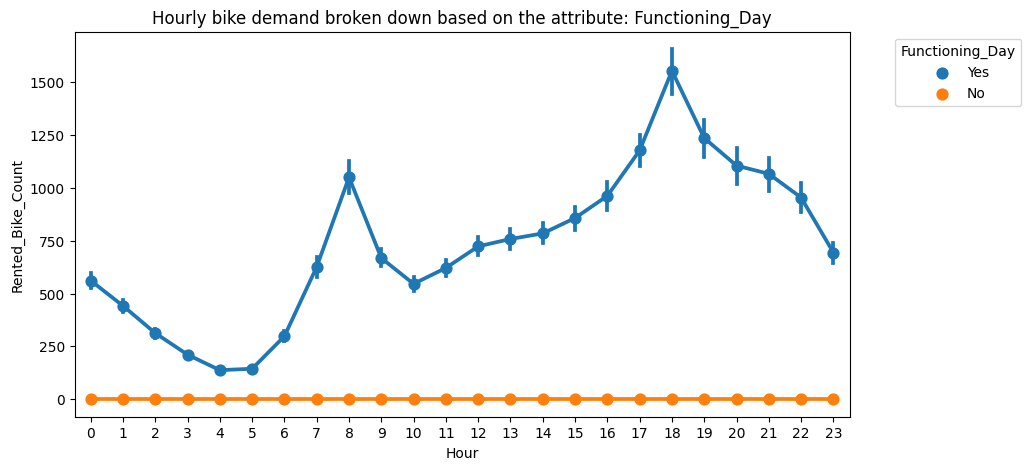

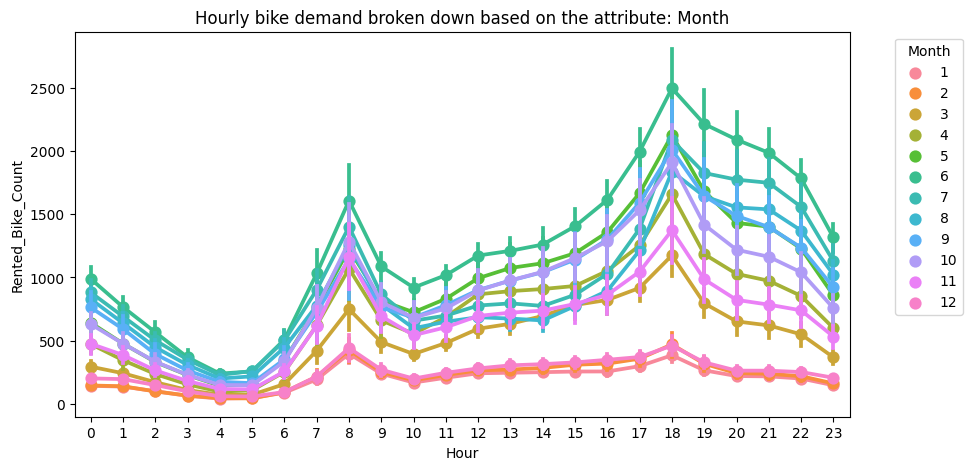

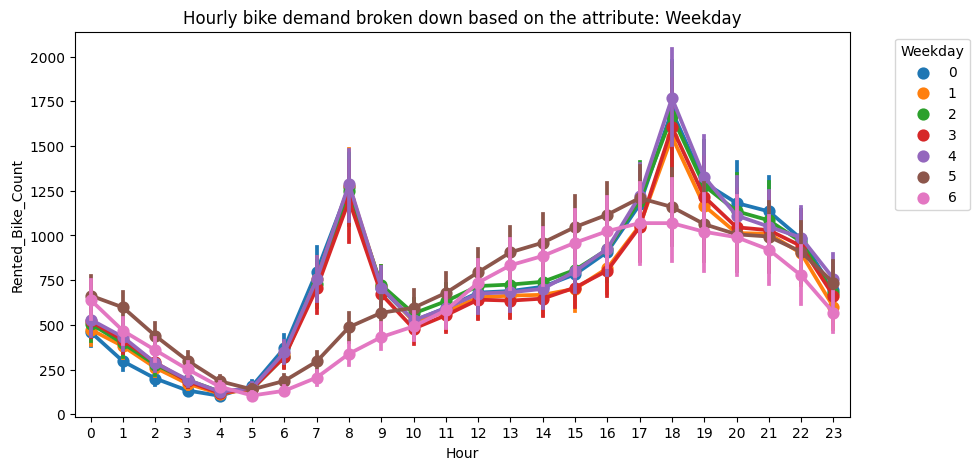

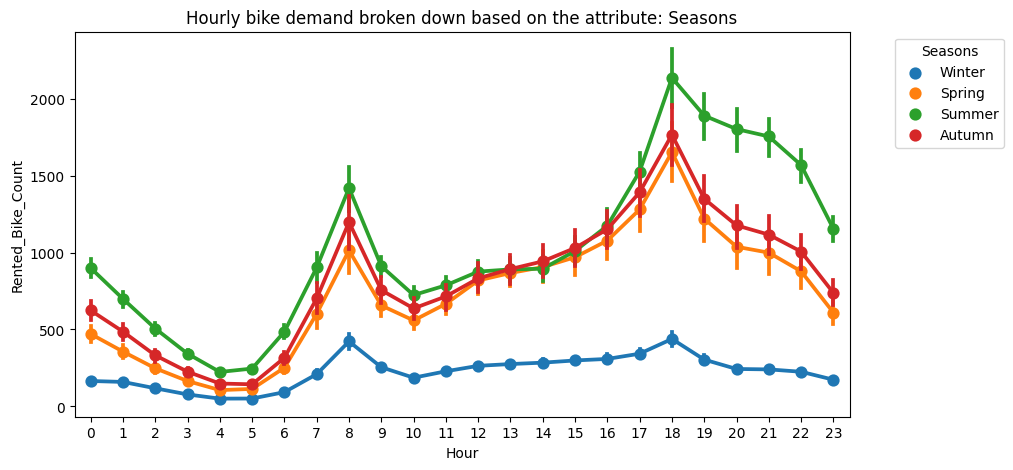

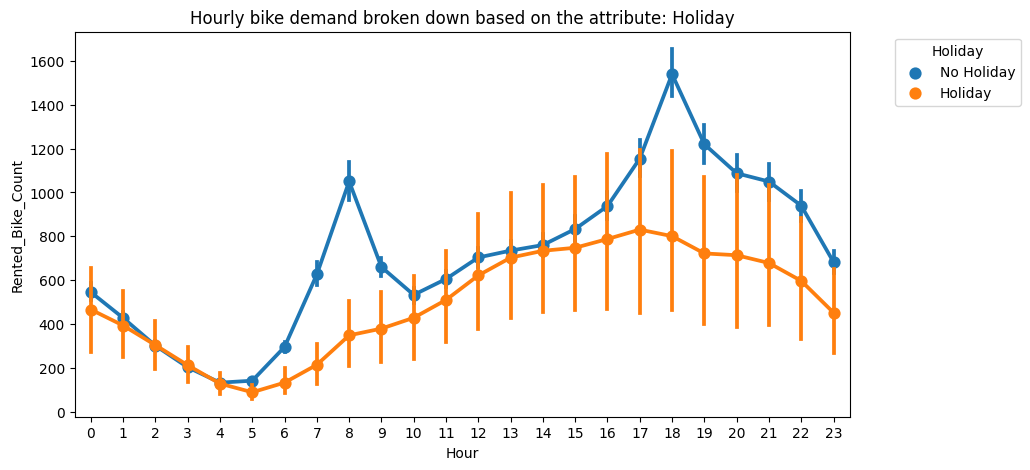

In [16]:
for i in categorical_features:
  if i == 'Hour':
    continue
  else:
    fig, ax = plt.subplots(figsize=(10,5))
    sns.pointplot(data=df, x='Hour', y='Rented_Bike_Count', hue=i, ax=ax)
    plt.title('Hourly bike demand broken down based on the attribute: '+i)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',title=i)
    plt.show

##### 1. Why did you pick the specific chart?

- This plot has been chosen to examine the number of rented bicycles during each hour of the day across various seasons, months, working days, and holidays.

##### 2. What is/are the insight(s) found from the chart?

  In all the charts, two distinct peaks were observed: one in the morning and another in the evening. These peaks correspond to the increased demand for bicycles during typical office hours.

  **1. Weekday**: Regarding weekdays, there are no peak days during the weekends, which is understandably due to the absence of office-goers.

  **2. Month:** When examining the data by month, a consistent daily trend is observed, but the demand varies between different months. Months 1, 11, and 12 exhibit the lowest demand.

  **3. Holiday**: On holidays, there are no discernible peaks in the data.

  **4. Seasons**: Across the seasons, a consistent trend is observed. Summer experiences the highest demand, while winter sees the lowest demand.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- The insights gained from the data analysis offer opportunities for positive business impact by optimizing resource allocation and understanding seasonal variations. However, the insights also highlight potential challenges during certain months and weekends that businesses need to address to ensure sustained growth and profitability.

### **Categorical features Analysis**

---



In [17]:
# function to draw barplot and boxplot
def categorical_plot(feat):
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))

    sns.barplot(x = df[feat], y = df['Rented_Bike_Count'], ax =axs[0])
    axs[0].set_title(f'{feat} vs Rented Bike Count')

    sns.boxplot(x = df[feat], y = df['Rented_Bike_Count'], ax = axs[1])
    axs[1].set_title(f'{feat} vs Rented Bike Count')

    plt.show()


#### **Column: Functioning day**

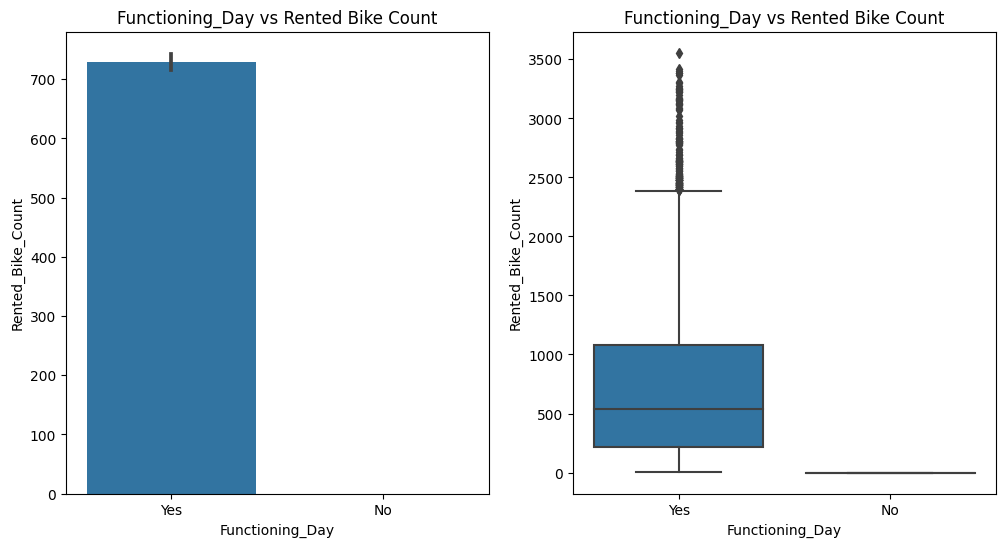

In [18]:
categorical_plot('Functioning_Day')

In [19]:
df['Functioning_Day'].value_counts()

Yes    8465
No      295
Name: Functioning_Day, dtype: int64

##### 1. Why did you pick the specific chart?

- This plot is picked to analyse relationship between the functioning day with rented bike count.


##### 2. What is/are the insight(s) found from the chart?

- There are very few Non functioning day.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- The Non functioning day can be utilised by company for Maintenance purpose.

#### **Column: Holiday**

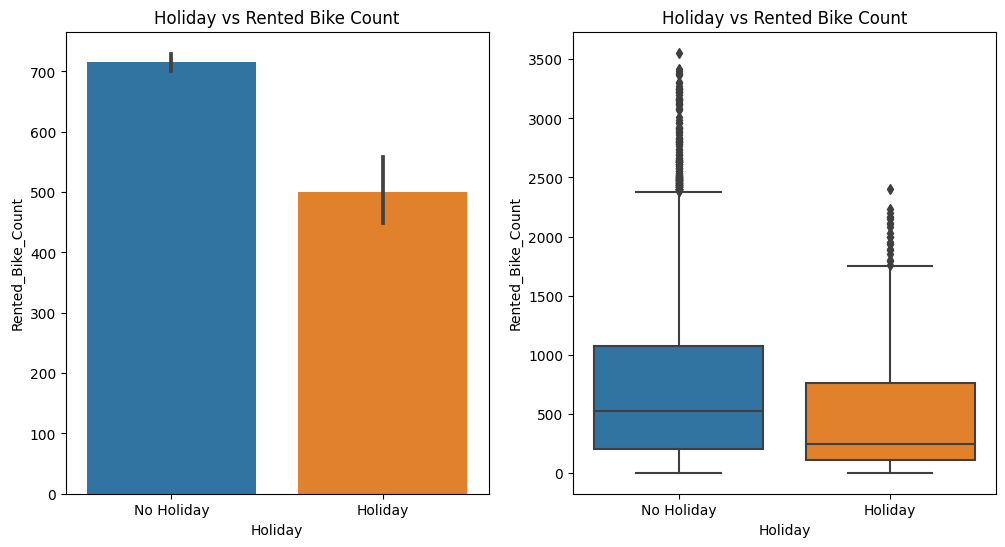

In [20]:
categorical_plot('Holiday')

##### 1. Why did you pick the specific chart?

- The barplot is pick to compare the rented bike count on holiday and non holiday.

##### 2. What is/are the insight(s) found from the chart?

- There are less rented bike count on holiday.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- This insight proves advantageous for the business since it enables the allocation of resources based on demand.

#### **Column: Month**

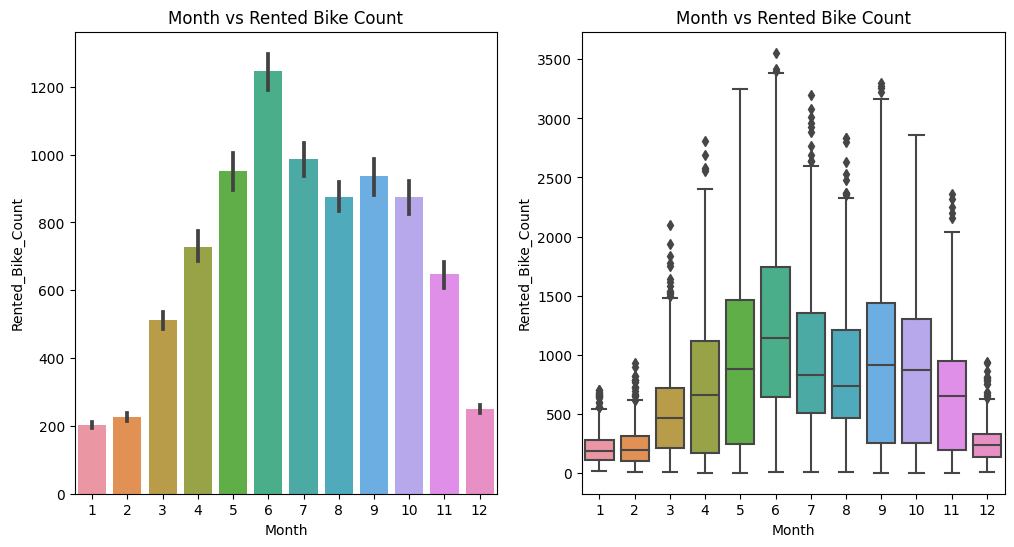

In [21]:
categorical_plot('Month')

##### 1. Why did you pick the specific chart?

- This plot is picked to compare the count of rented bike in different months.

##### 2. What is/are the insight(s) found from the chart?

- Highest booking: May
- Lowest booking: January

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Pricing strategies, resource allocation, and marketing strategies can be tailored according to the varying demand across different seasons.

#### **Column: Seasons**

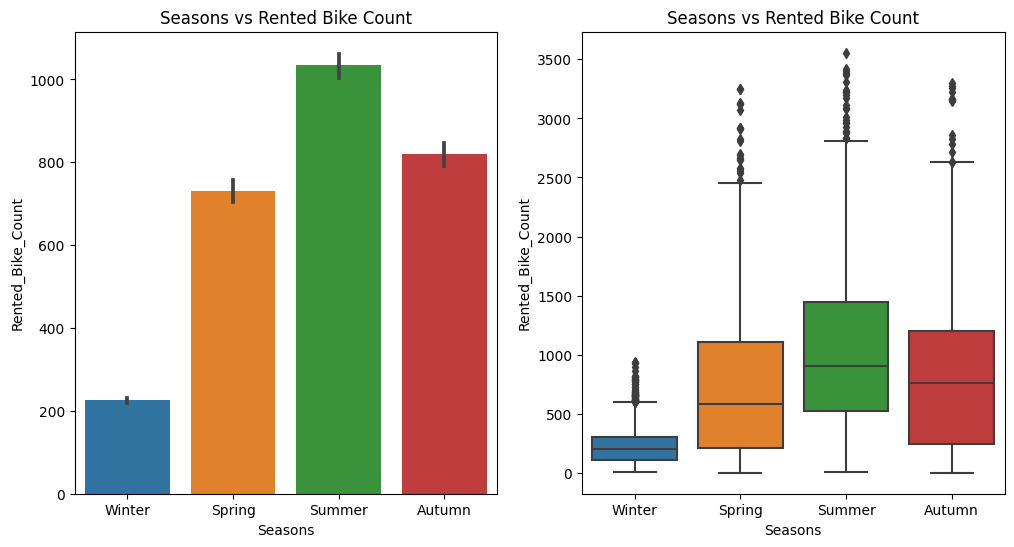

In [22]:
categorical_plot('Seasons')

##### 1. Why did you pick the specific chart?

- The bar plot is chosen to compare the variations in rented bike counts across various seasons.

##### 2. What is/are the insight(s) found from the chart?

- Summer has the highest demand and winter has the lowest demand.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Pricing strategies, resource allocation, and marketing strategies can be tailored according to the varying demand across different seasons.

#### **Column: Weekday**

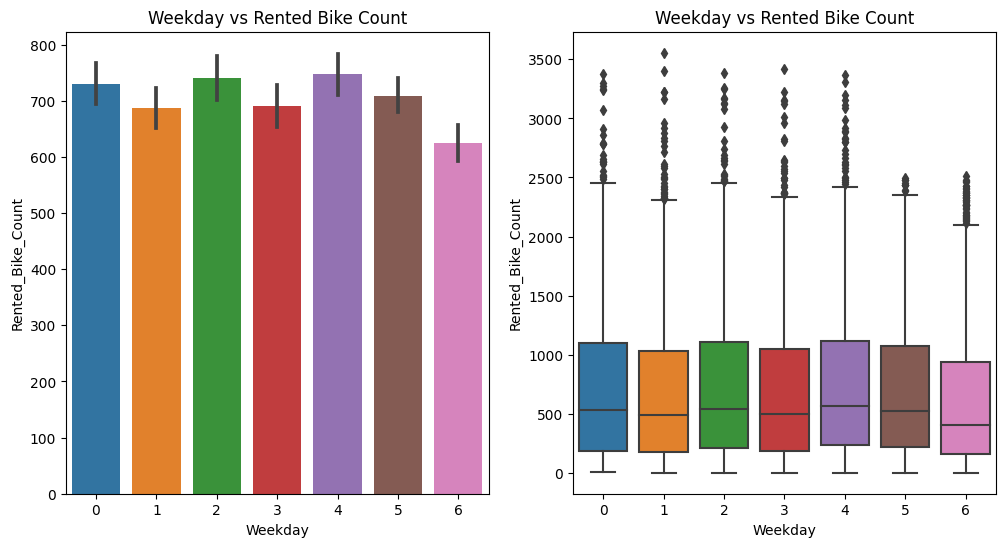

In [23]:
categorical_plot('Weekday')

##### 1. Why did you pick the specific chart?

- This plot is pick to compare the rented bike count within a week.

##### 2. What is/are the insight(s) found from the chart?

- Weekend has lowest demand.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Business can utilise the low demand period to do the maintenance
work.

#### **Column: Hour**

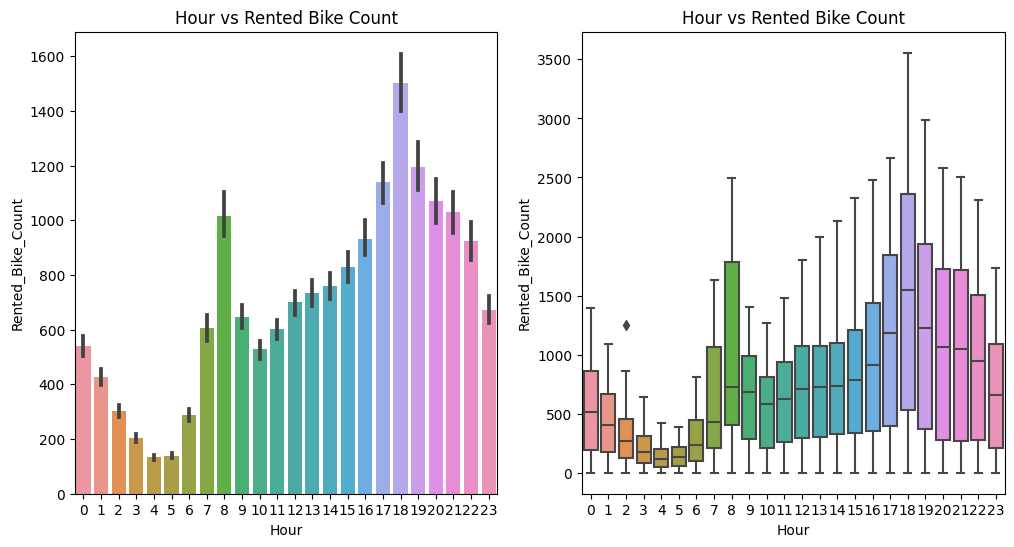

In [24]:
categorical_plot('Hour')

##### 1. Why did you pick the specific chart?

- This plot is to compare the demand of rented bike throughout a day.

##### 2. What is/are the insight(s) found from the chart?

- Highest demand: At 6 PM.
- Lowest demand: At 4 AM

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Businesses must guarantee an adequate bike supply during peak hours of the day, and pricing can be flexibly adapted to match demand fluctuations throughout different time periods.

### **Numerical features Analysis**

---



1. Check skewness: Distribution plot, boxplot and Q-Q plot  of each numerical feature.
2. Check linear relationship: scatter plot wrt dependent var to check colinear relation.

#### **Skewness**

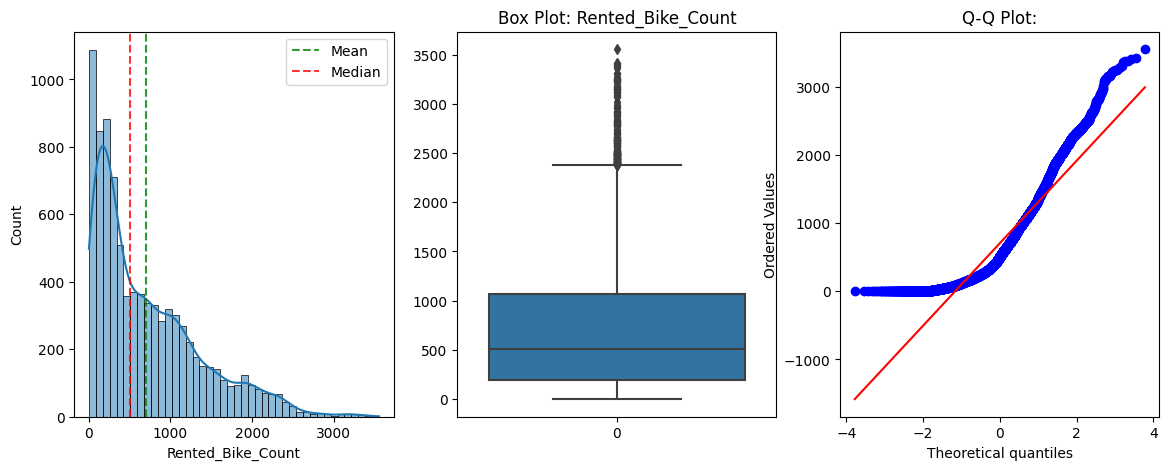

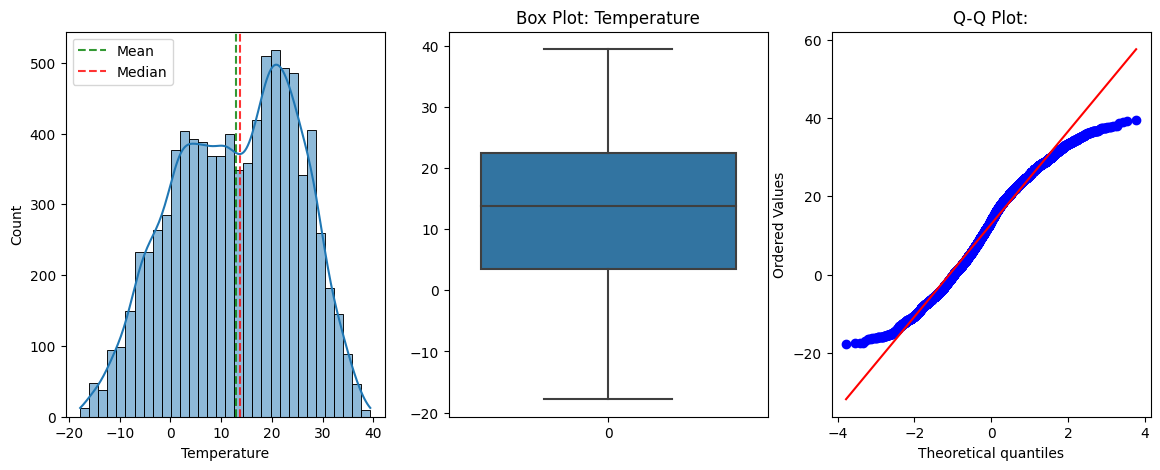

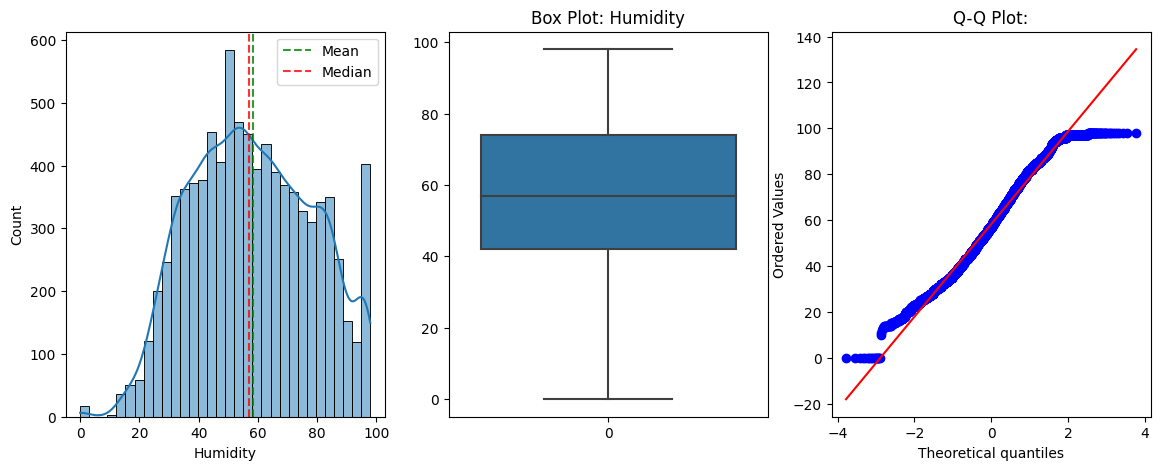

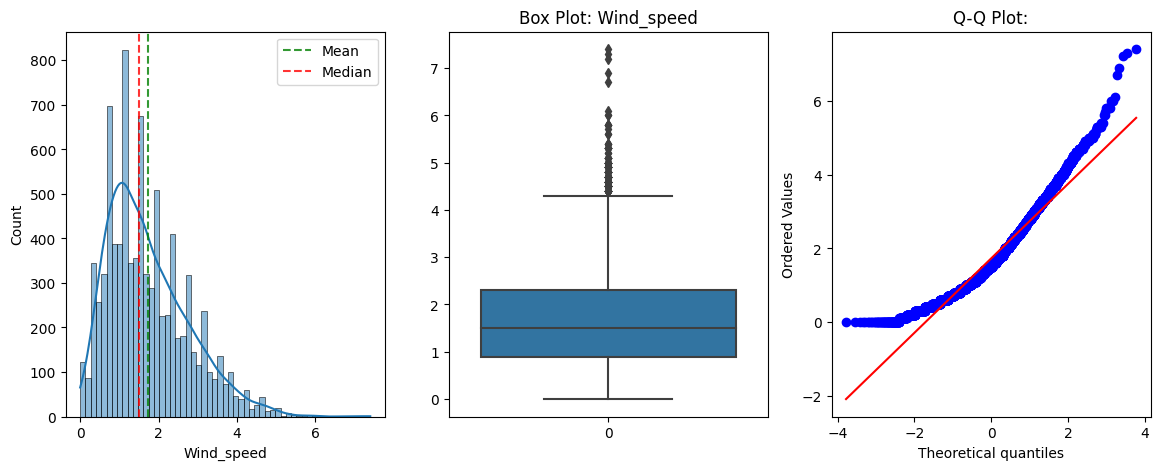

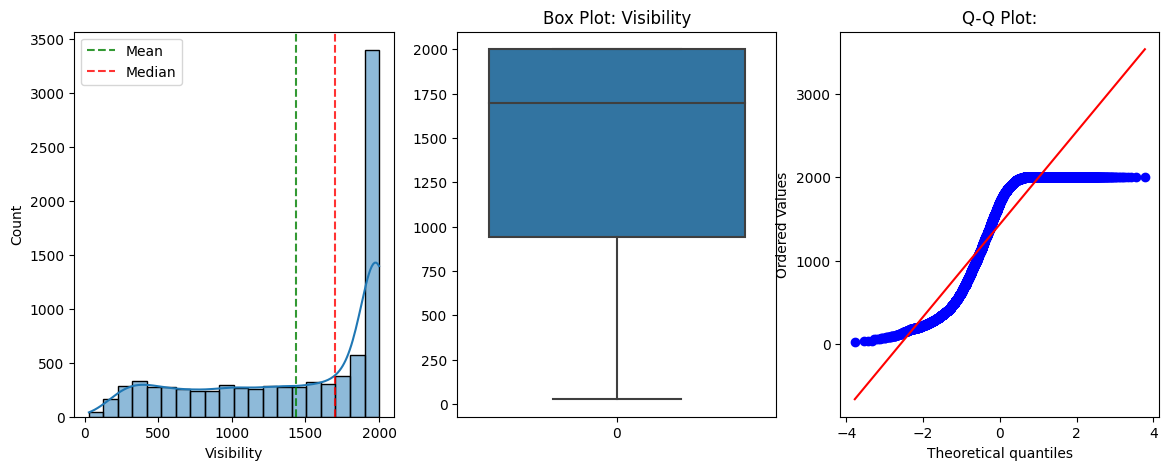

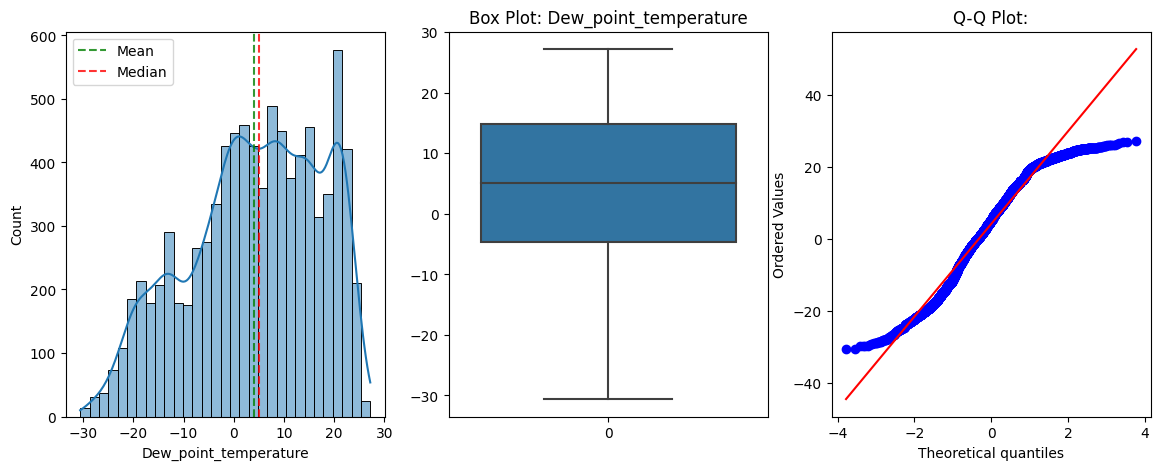

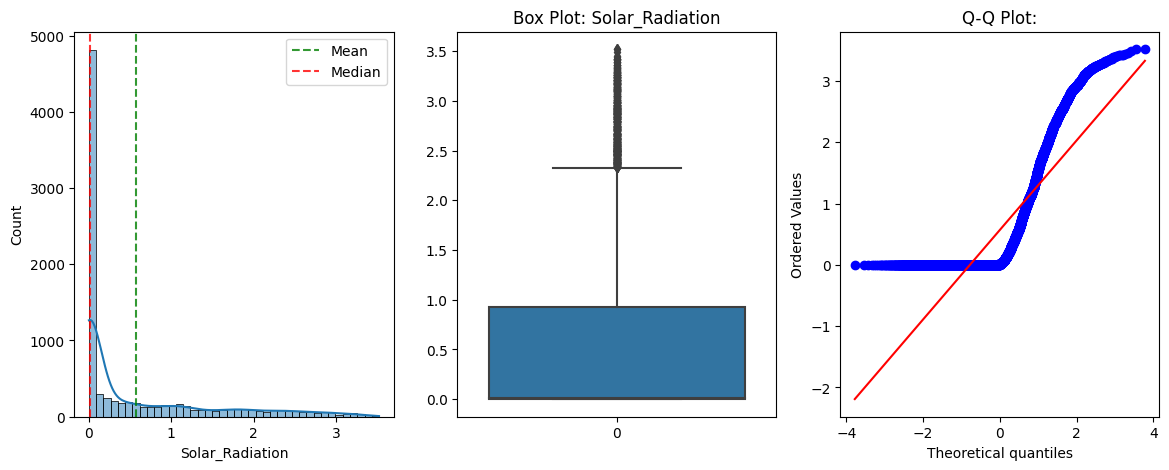

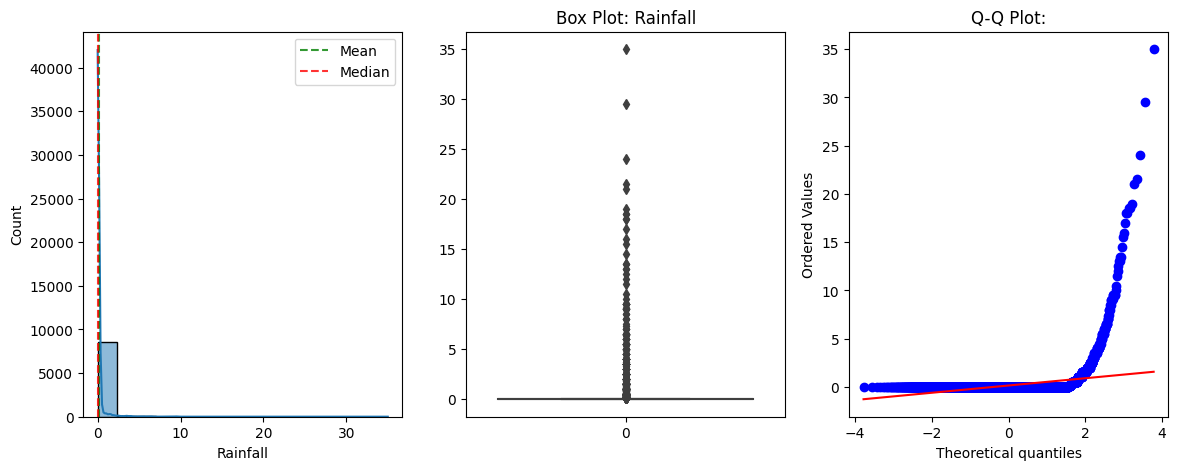

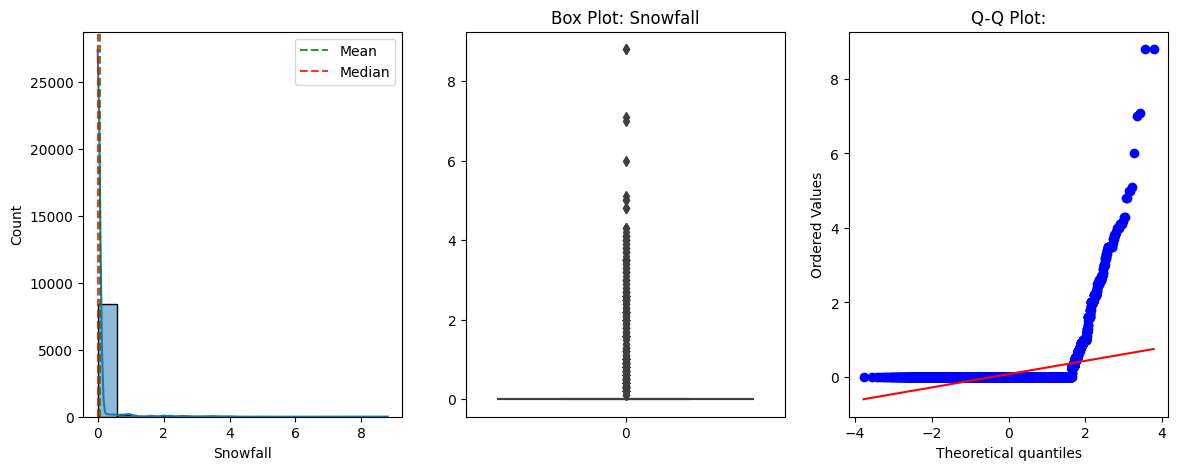

In [25]:
# Chart - 1 visualization code
for feat in numerical_features:

    # Create a 2x2 grid of subplots
    fig, axs = plt.subplots(1, 3, figsize=(14, 5))

    # Subplot 1: Histogram
    sns.histplot(df[feat], kde = True, ax=axs[0])
    axs[0].axvline(df[feat].mean(), color ="green", alpha = 0.8, lw = 1.5, linestyle='dashed', label = 'Mean')
    axs[0].axvline(df[feat].median(), color ="red", alpha = 0.8, lw = 1.5, linestyle='dashed', label = 'Median')
    axs[0].legend()

    # Subplot 2: Boxplot
    sns.boxplot(df[feat], ax=axs[1])
    axs[1].set_title(f'Box Plot: {feat}')

    #Subplot 3: Q-Q plot
    stats.probplot(df[feat], plot = axs[2], dist="norm")
    axs[2].set_title('Q-Q Plot:')

    # Show the plot
    plt.show()

##### 1. Why did you pick the specific chart?

- These plots are picked to check which features follow normal distribution.
- QQ Plot: short for Quantile-Quantile plots, are graphical tools used for are often used to assess whether a dataset follows a normal distribution. When plotting the quantiles of the data against the quantiles of a normal distribution, a straight line indicates a good fit to a normal distribution, while deviations suggest departures from normality.

##### 2. What is/are the insight(s) found from the chart?

- **Normally Distributed**: Temperature and humidity.
- **Positively Skewed**: Rented bike count, Wind speed, Visibility, Solar radiation, Rainfall and Snowfall
- **Negatively Skewed**: Visibility.
- Snowfall and Rainfall both are highly skewed.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Skewed data requires transformation to improve the performance of ML models.

#### **Regression Plot**

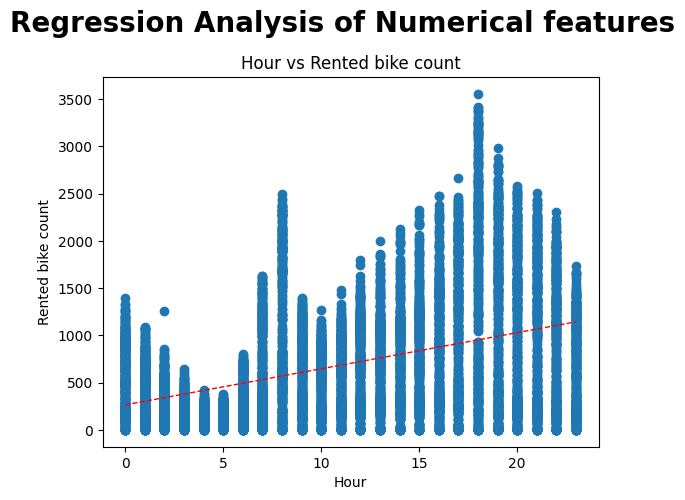

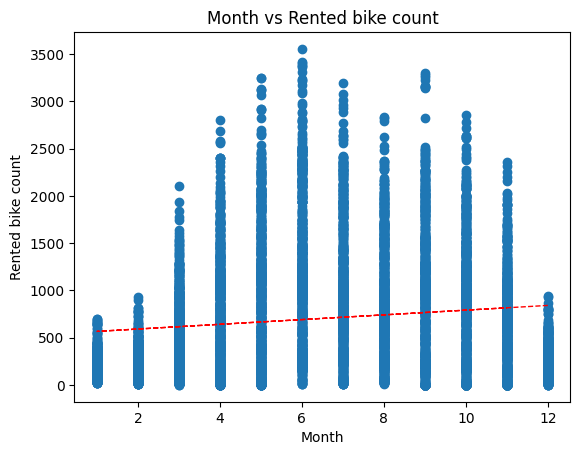

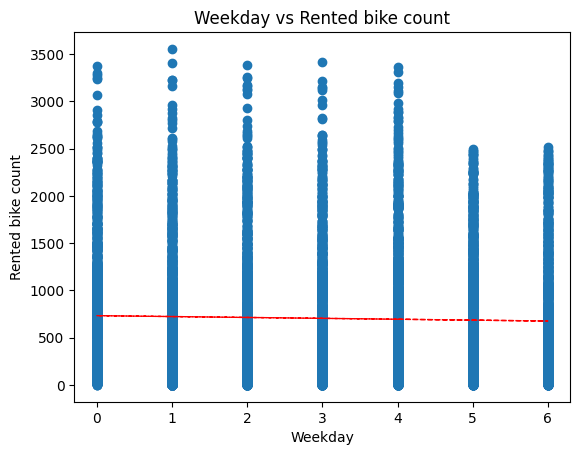

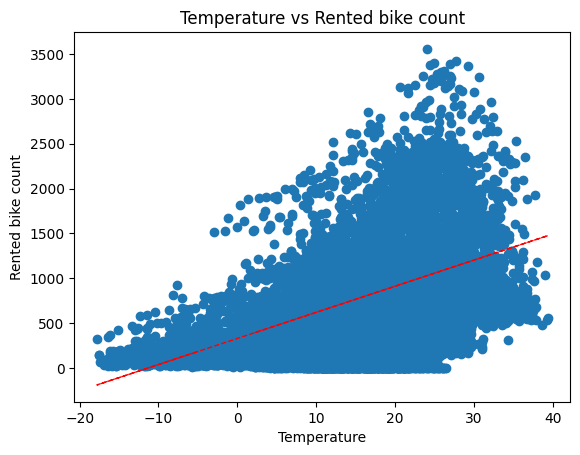

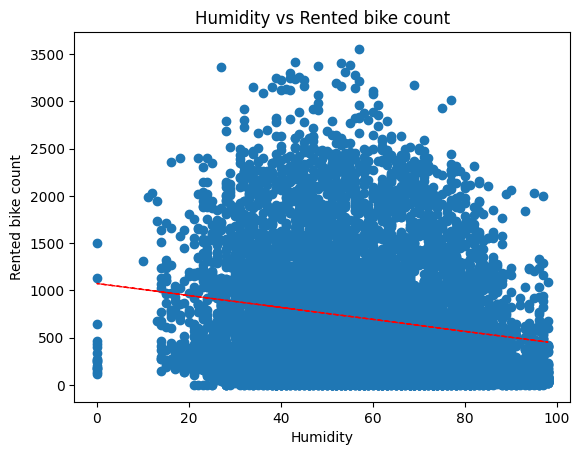

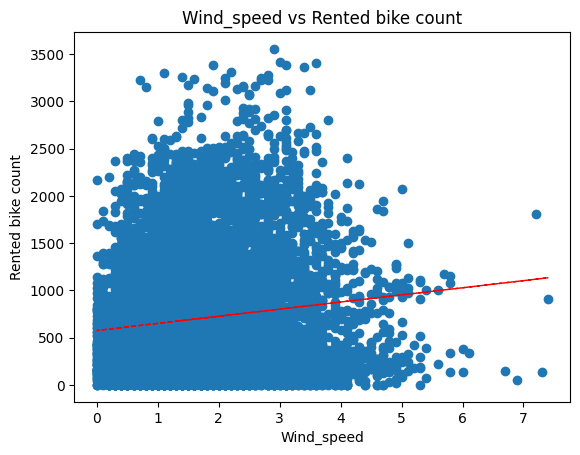

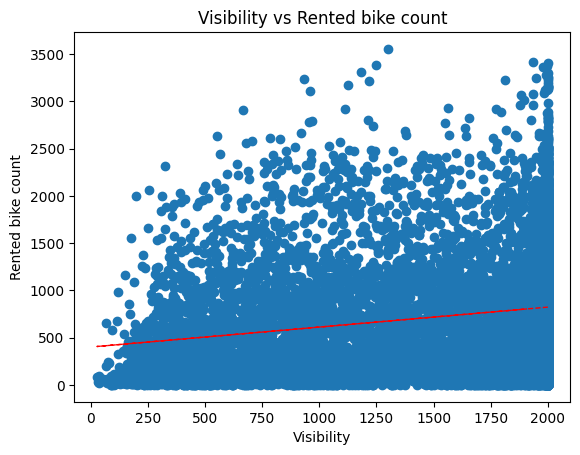

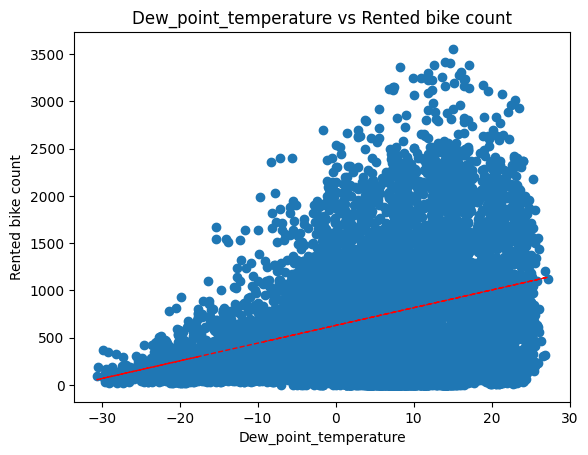

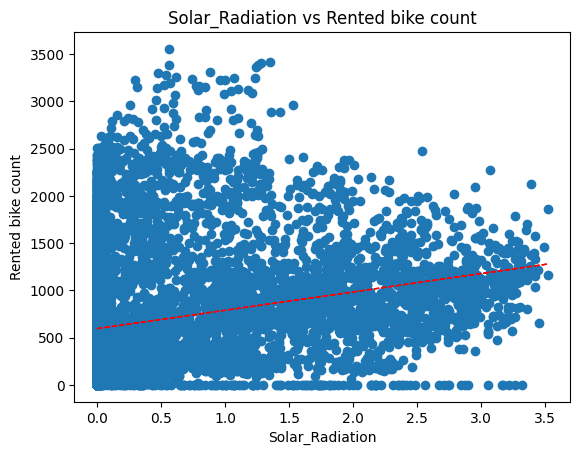

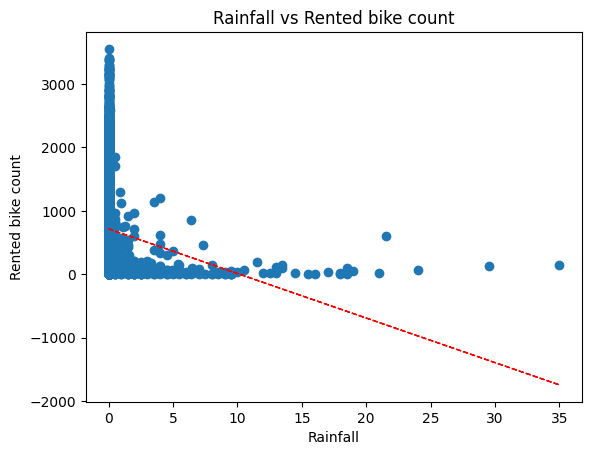

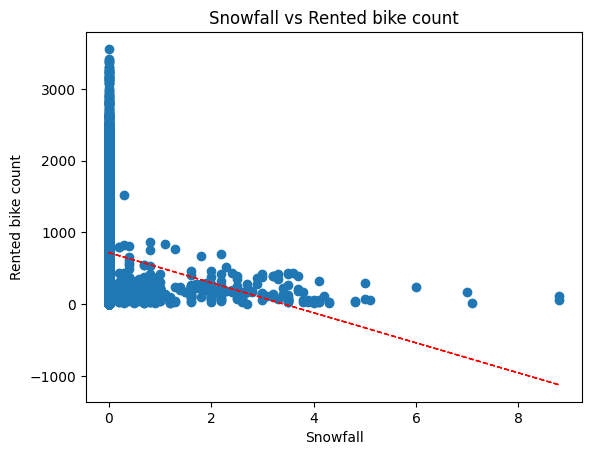

In [26]:
# Lets check the linear relationship with dependent variable. , alpha=0.5
columns = ['Hour', 'Month', 'Weekday']
features = columns + numerical_features

plt.suptitle('Regression Analysis of Numerical features', fontsize=20, fontweight='bold', y=1.02)

for feat in features:
  if feat != 'Rented_Bike_Count':
    # draw scatter plot
    plt.scatter(x = df[feat], y = df['Rented_Bike_Count'])
    plt.xlabel(feat)
    plt.ylabel('Rented bike count')

    # subplot : polyfit line
    z = np.polyfit(df[feat], df['Rented_Bike_Count'], 1)
    y_hat = np.poly1d(z)(df[feat])
    plt.plot(df[feat], y_hat, "r--", lw=1)

    # show plot
    plt.title(feat + ' vs ' + 'Rented bike count')
    plt.show()

##### 1. Why did you pick the specific chart?

- A regression plot used in statistics and data analysis to visualize the relationship between two or more variables.

##### 2. What is/are the insight(s) found from the chart?

- Most of the numerical features are positively correlated to our target variable.
- Humidity, Snowfall and Rainfall show negative correlation.

### **Correlation Heatmap**

<ipython-input-27-6c841a889961>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


<Axes: >

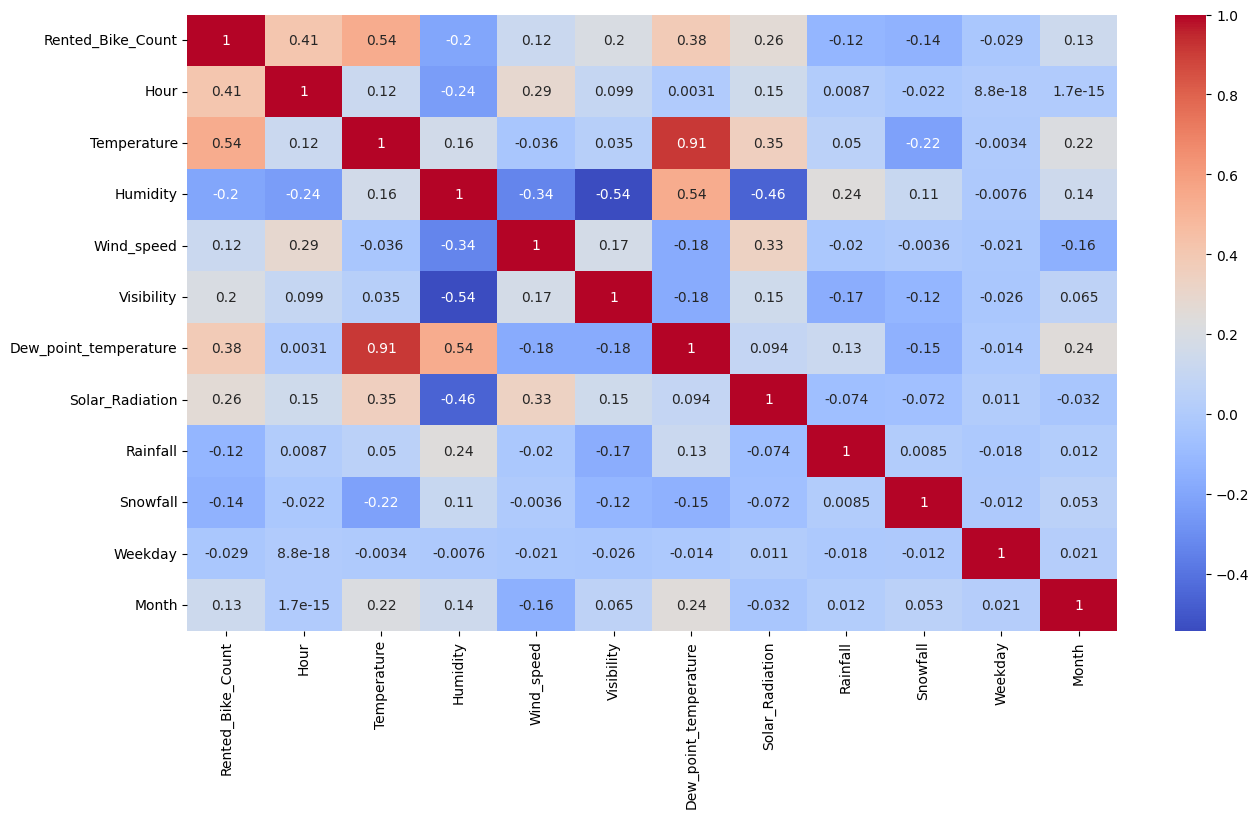

In [27]:
# Correlation Heatmap visualization code
## Correlation
plt.figure(figsize=(15,8))
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')

##### 1. Why did you pick the specific chart?

- This plot is selected to determine the correlation between various features and the count of rented bikes, as well as to assess the correlations among the features themselves.

##### 2. What is/are the insight(s) found from the chart?

-  Rented bike count exhibits stronger correlations with the Hour and Temperature variables.
- Temperature is highly correlated with Dew point temperature.
- Weekday has no correlation with bike count so we can drop this column.


### **Pair Plot**

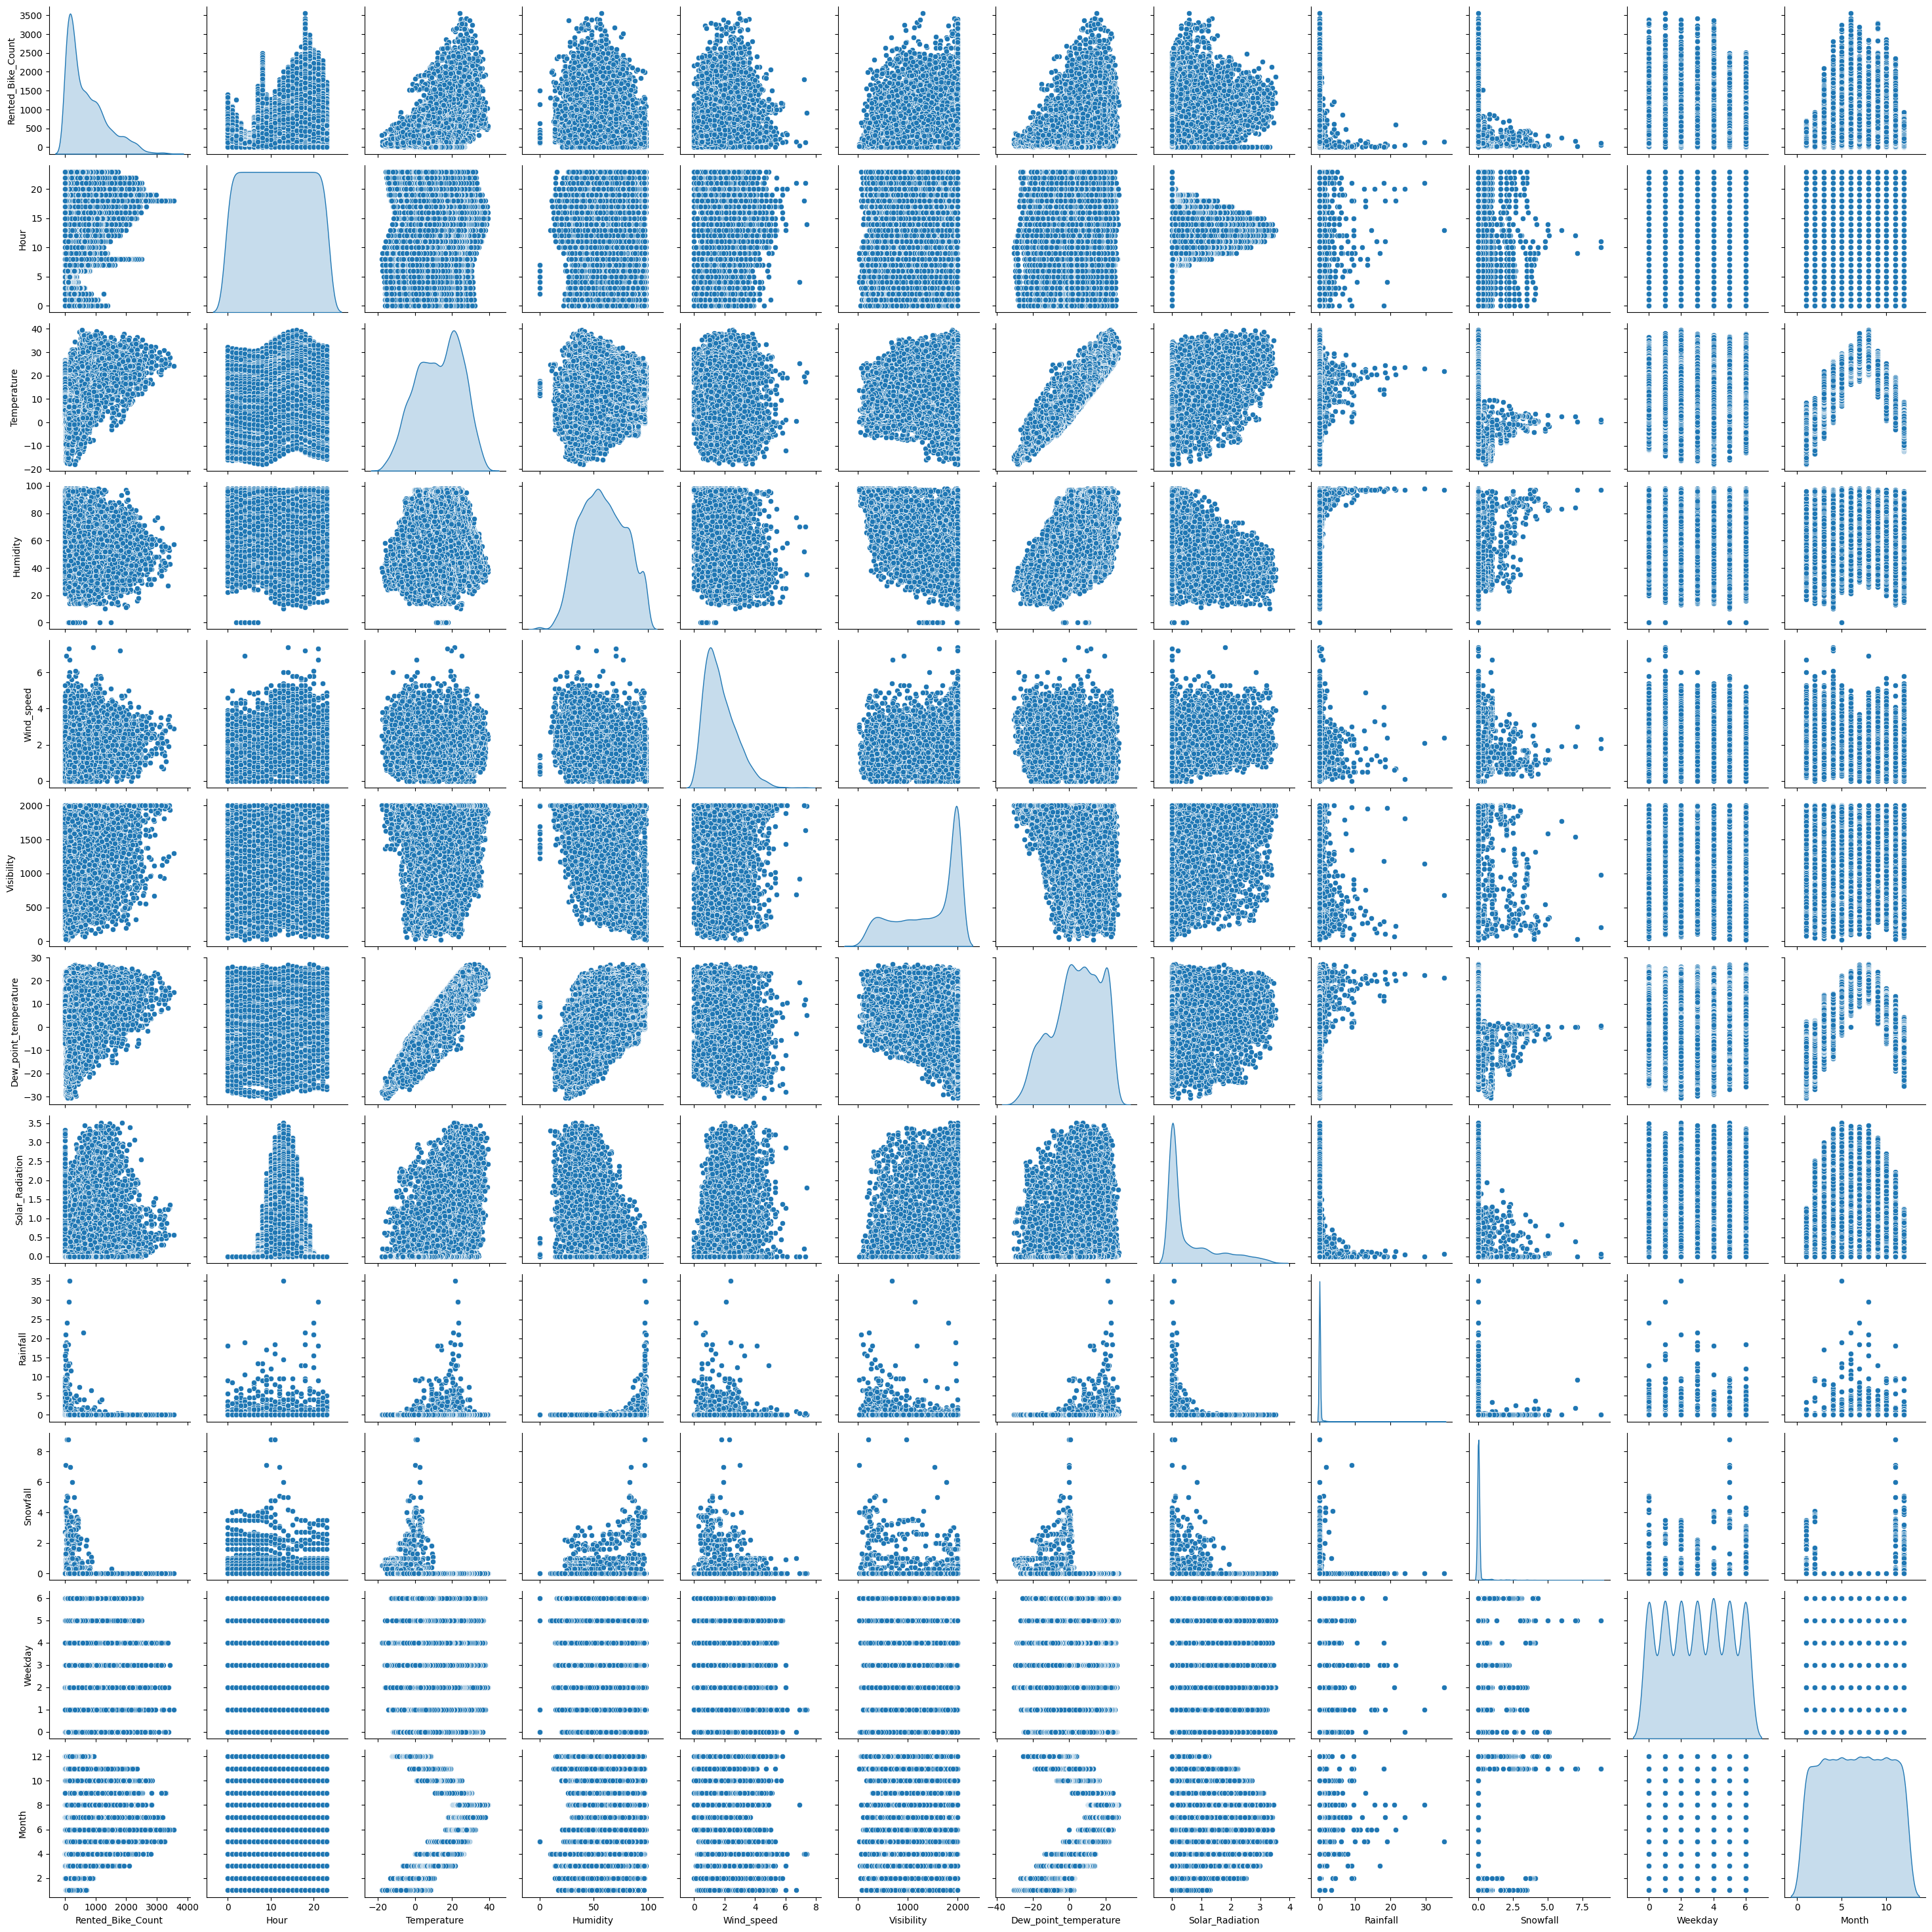

In [28]:
# Pair Plot visualization code
sns.pairplot(df, diag_kind='kde')

##### 1. Why did you pick the specific chart?

- Pair plot is picked to visually explore the relationships between multiple pairs of variables in a dataset.